In [ ]:
## import requests
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 3
sns.set()

In [134]:
def fetch():
    path = 'nba.csv'
    if not os.path.exists(path):
        url = 'https://stats.nba.com/stats/leaguegamelog/'
        params = (
            ('Counter', '0'),
            ('DateFrom', ''),
            ('DateTo', ''),
            ('Direction', 'ASC'),
            ('LeagueID', '00'),
            ('PlayerOrTeam', 'T'),
            ('Season', '2017-18'),
            ('SeasonType', 'Regular Season'),
            ('Sorter', 'DATE'),
        )
        headers = {
            'User-Agent': 'PostmanRuntime/7.4.0'
        }
        response = requests.get(url, params=params, headers=headers)
        data = response.json()['resultSets'][0]
        df = pd.DataFrame(data=data['rowSet'], columns=data['headers'])
        df.to_csv(path, index=False)
        return df
    else:
        return pd.read_csv(path)
    
df = fetch()
orig = df.copy()

In [135]:
df.head(5)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,1610612744,GSW,Golden State Warriors,21800002,2018-10-16,GSW vs. OKC,W,240,42,...,41,58,28,7,7,21,29,108,8,1
1,22018,1610612760,OKC,Oklahoma City Thunder,21800002,2018-10-16,OKC @ GSW,L,240,33,...,29,45,21,12,6,15,21,100,-8,1
2,22018,1610612755,PHI,Philadelphia 76ers,21800001,2018-10-16,PHI @ BOS,L,240,34,...,41,47,18,8,5,16,20,87,-18,1
3,22018,1610612738,BOS,Boston Celtics,21800001,2018-10-16,BOS vs. PHI,W,240,42,...,43,55,21,7,5,15,20,105,18,1
4,22018,1610612750,MIN,Minnesota Timberwolves,21800010,2018-10-17,MIN @ SAS,L,240,39,...,32,46,20,9,2,11,27,108,-4,1


In [136]:
df["WON"] = df["WL"]
df["WON"] = df["WON"].replace("W", 1)
df["WON"] = df["WON"].replace("L", 0)
df.head(5)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,WON
0,22018,1610612744,GSW,Golden State Warriors,21800002,2018-10-16,GSW vs. OKC,W,240,42,...,58,28,7,7,21,29,108,8,1,1
1,22018,1610612760,OKC,Oklahoma City Thunder,21800002,2018-10-16,OKC @ GSW,L,240,33,...,45,21,12,6,15,21,100,-8,1,0
2,22018,1610612755,PHI,Philadelphia 76ers,21800001,2018-10-16,PHI @ BOS,L,240,34,...,47,18,8,5,16,20,87,-18,1,0
3,22018,1610612738,BOS,Boston Celtics,21800001,2018-10-16,BOS vs. PHI,W,240,42,...,55,21,7,5,15,20,105,18,1,1
4,22018,1610612750,MIN,Minnesota Timberwolves,21800010,2018-10-17,MIN @ SAS,L,240,39,...,46,20,9,2,11,27,108,-4,1,0


In [137]:
df = df[["TEAM_NAME", "GAME_ID", "PTS", "WON"]]
df.head(5)

,TEAM_NAME,GAME_ID,PTS,WON
0,Golden State Warriors,21800002,108,1
1,Oklahoma City Thunder,21800002,100,0
2,Philadelphia 76ers,21800001,87,0
3,Boston Celtics,21800001,105,1
4,Minnesota Timberwolves,21800010,108,0


In [138]:
df.iloc[0, :]

TEAM_NAME    Golden State Warriors
GAME_ID                   21800002
PTS                            108
WON                              1
Name: 0, dtype: object

In [139]:
# will make our figures later look nicer
df = df.sort_values("PTS")

### Using Linear Regression to Predict Game Outcome

In [ ]:
plt.plot(df["PTS"], df["WON"], 'o')
plt.xlabel("PTS")
plt.ylabel("WON") 
#plt.savefig('WON_vs_PTS.png', dpi = 300, bbox_inches = "tight")

Suppose we want to try to predict who wins a game based only on the number of points scored by team A.

In [ ]:
plt.plot(df["PTS"], df["WON"] + np.random.uniform(-0.05, 0.05, len(df["WON"])), 'o')
plt.xlabel("PTS")
plt.ylabel("WON") 
#plt.savefig('WON_vs_PTS_jittered.png', dpi = 300, bbox_inches = "tight")

One naive approach is to simply use linear regression to try to predict the "WIN" variable.

In [ ]:
from sklearn.linear_model import LinearRegression
linmod = LinearRegression()
linmod.fit( df[["PTS"]], df["WON"])

In [ ]:
linmod.coef_

In [ ]:
linmod.intercept_

In [ ]:
predictions = linmod.predict(df[["PTS"]])
plt.plot(df["PTS"], df["WON"] + np.random.uniform(-0.05, 0.05, len(df["WON"])), 'o')
plt.plot(df[["PTS"]], predictions)
plt.xlabel("PTS")
plt.ylabel("WON")
#plt.savefig('WON_vs_PTS_linear_regression.png', dpi = 300, bbox_inches = "tight")

Linear model provides a number that we need to somehow convert into a classification. Can think of this number as how confident we are on that the team will win. With that in mind, we can pick an arbitrary threshold, say 0.5, to convert into a classification.

In [ ]:
def convert_predictions_to_classifications(predictions):
    return [1 if x > 0.5 else 0 for x in predictions]

In [ ]:
classifications = convert_predictions_to_classifications(predictions)

In [ ]:
predictions = linmod.predict(df[["PTS"]])
plt.plot(df["PTS"], df["WON"] + np.random.uniform(-0.05, 0.05, len(df["WON"])), 'o')
plt.plot(df[["PTS"]], classifications)
plt.xlabel("PTS")
plt.ylabel("WON")
plt.savefig('WON_vs_PTS_linear_regression_thresholded.png', dpi = 300, bbox_inches = "tight")

### Binned Probability Prediction

An alternate approach to modeling is to do what I will call "Binned Probability Prediction".

We will break out data into several bins, and compute the average win rate in each bin.

In [ ]:
# remove the outlier game that had 4x overtime
df_filtered = df.query("PTS < 160").copy()

In [ ]:
bins = pd.cut(df_filtered["PTS"], 6)
bins

In [ ]:
jittered_win_data = df_filtered["WON"] + np.random.uniform(-0.05, 0.05, len(df_filtered["WON"]))

In [ ]:
plt.plot(df_filtered["PTS"], jittered_win_data, 'o')
for x in bins.unique():
    plt.axvline(x.left, color = 'darkgray', linestyle = "dashed")
    
plt.xlabel("PTS")
plt.ylabel("WON")
plt.savefig('WON_vs_PTS_binned.png', dpi = 300, bbox_inches = "tight")    

In [ ]:
df_filtered["bin"] = bins
df_filtered.head(5)

In [ ]:
bin_centers = [(b.left + b.right) / 2 for b in bins]
#bin_centers

In [ ]:
df_filtered["bin"] = bin_centers
df_filtered.head(5)

In [ ]:
df_filtered.groupby("bin").size()

In [ ]:
def win_rate(win_series):
    num_won = sum(win_series)
    num_played = len(win_series)
    return num_won / num_played
win_rates_by_bin = df_filtered.groupby("bin")["WON"].agg(win_rate)
win_rates_by_bin

In [ ]:
plt.plot(df_filtered["PTS"], jittered_win_data, 'o')
plt.plot(win_rates_by_bin.iloc[0:4], 'r')
plt.plot(win_rates_by_bin.iloc[0:4], 'r*')
plt.xlabel("PTS")
plt.ylabel("WON")
for x in bins.unique():
    plt.axvline(x.left, color = 'darkgray', linestyle = "dashed")
plt.legend(['data', 'win chance'])
plt.savefig('WON_vs_PTS_binned_annotated_1st_four.png', dpi = 300, bbox_inches = "tight")

In [ ]:
plt.plot(df_filtered["PTS"], jittered_win_data, 'o')
plt.plot(win_rates_by_bin, 'r')
plt.plot(win_rates_by_bin, 'r*')
plt.xlabel("PTS")
plt.ylabel("WON")
for x in bins.unique():
    plt.axvline(x.left, color = 'darkgray', linestyle = "dashed")
plt.legend(['data', 'win chance'])
plt.savefig('WON_vs_PTS_binned_annotated.png', dpi = 300, bbox_inches = "tight")

### Logistic Regression

In linear regression, we make predictions that look like:

$y = \sum_{j=1}^d \theta_j \phi_j$

In the example earlier, we had two features, a y-intercept and a slope, i.e. $\text{WON} = \theta_0 + \theta_1 \times \text{PTS}$.

In logistic regression, rather than fitting a line, we fit a "logistic curve", which models the binned probability prediction curve above. 

A logistic curve is an s-shaped curve that starts at 0 and ends at 1, and is given by the equation $\sigma(y) = 1 / (1 + e^{-y})$, where y is some arbitrary independent variable. We omit the derivation of this equation in this lecture. See [http://www.win-vector.com/blog/2011/09/the-simpler-derivation-of-logistic-regression/](http://www.win-vector.com/blog/2011/09/the-simpler-derivation-of-logistic-regression/) if you're curious.

As a specific example, if we're trying to predict the win rate from points, our model will output $1 / \left(1 + e^{-(\theta_0 + \theta_1 \times \text{PTS})}\right)$. Note that in this case $y$ is just the prediction made by a linear regression model.

That is, we can think of the logistic regression model as a non-linear transformation of our linear regression model, i.e. the straight line is bent into an s-shaped curve.

The resulting $\theta$ values will be quite different. Whereas for our linear regression, we found that $\theta_0 = -1.53$ and $\theta_1 = 0.018$ approximated our data, that is $WON = -1.53 + 0.018 \times PTS$.

For our logistic regression, $\theta_0 = -11$, $\theta_1 = 0.1$ works quite nicely for our data. That is $1 / \left(1 + e^{11 - 0.1 \times \text{PTS})}\right)$

In [ ]:
predictions = 1/(1+np.exp(11 - 0.1*df_filtered[["PTS"]]))
plt.plot(df_filtered["PTS"], jittered_win_data, 'o')
plt.plot(df_filtered[["PTS"]], predictions)
plt.xlabel("PTS")
plt.ylabel("WON")

Compare with our binned probability prediction earlier.

In [ ]:
predictions = 1/(1+np.exp(11 - 0.1*df_filtered[["PTS"]]))
plt.plot(df_filtered["PTS"], jittered_win_data, 'o')
plt.plot(df_filtered[["PTS"]], predictions)
plt.plot(win_rates_by_bin, 'r')
plt.plot(win_rates_by_bin, 'r*')
plt.legend(['data', 'logistic prediction', 'bin prediction'], loc = "lower right")
plt.xlabel("PTS")
plt.ylabel("WON")
plt.savefig('WON_vs_PTS_binned_annotated_and_logistic_curve.png', dpi = 300, bbox_inches = "tight")

We can also get a steeper version of the same curve by adjusting $\theta_0$ and $\theta_1$ so that we still get 50% at the same PTS value.

In [ ]:

plt.plot(df_filtered["PTS"], jittered_win_data, 'o')
plt.plot(df_filtered[["PTS"]], 1/(1+np.exp(11 - 0.1*df_filtered[["PTS"]])), color='#dd8452')
plt.plot(df_filtered[["PTS"]], 1/(1+np.exp(22 - 0.2*df_filtered[["PTS"]])), color='#dd8452', linestyle='dashed')
plt.legend(['data', 'logistic', 'steeper logistic'])
plt.xlabel("PTS")
plt.ylabel("WON")
plt.savefig('logistic_and_steeper_logistic.png', dpi = 300, bbox_inches = "tight")

In [ ]:
plt.plot(df_filtered["PTS"], jittered_win_data, 'o')
plt.plot(df_filtered[["PTS"]], 1/(1+np.exp(11 - 0.1*df_filtered[["PTS"]])), color='#dd8452')
plt.xlabel("PTS")
plt.ylabel("WON")
plt.savefig('logistic_only.png', dpi = 300, bbox_inches = "tight")

#### Logistic Regression Fitting Example

To fir a model, we need to first pick a loss function. Let's use the mean squared error. There are other reasonable choices, but we'll use MSE since it's familiar.

In [ ]:
from sklearn.metrics import mean_squared_error

As an example, let's consider a tiny dataset with only 3 games.

In [ ]:
df_3 = df.iloc[[25, 195, 517], :].copy()
df_3

In [ ]:
plt.plot(df_3["PTS"], df_3["WON"], 'o')
x_vals = np.linspace(80, 130)
plt.plot(x_vals, 1/(1+np.exp(11 - 0.1*x_vals)), color='#dd8452')
plt.xlabel("PTS")
plt.ylabel("WON")
plt.savefig("loss_example.png", bbox_inches = "tight", dpi = 300)

In [ ]:
plt.plot(df_3["PTS"], df_3["WON"], 'o')
x_vals = np.linspace(80, 130)
plt.plot(x_vals, 1/(1+np.exp(100 - 0.1*x_vals)), color='#dd8452')
plt.xlabel("PTS")
plt.ylabel("WON")
plt.savefig("loss_example_2.png", bbox_inches = "tight", dpi = 300)

In [ ]:
def sigma(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def mse_loss(theta0, theta1, x, y_obs):
    y_hat = sigma(theta0 + theta1 * x)
    return mean_squared_error(y_obs, y_hat)  

In [ ]:
mse_loss(theta0 = -11, theta1 = 0.1, 
         x = df["PTS"], y_obs = df["WON"])

In [ ]:
mse_loss(theta0 = -11.1, theta1 = 0.1, 
         x = df["PTS"], y_obs = df["WON"])

In [ ]:
mse_loss(theta0 = -11.09, theta1 = 0.1, 
         x = df["PTS"], y_obs = df["WON"])

First, consider our 3 data point example.

In [ ]:
mse_loss(theta0 = -11, theta1 = 0.11, 
         x = df_3["PTS"], y_obs = df_3["WON"])

In [ ]:
mse_loss(theta0 = -100, theta1 = 0.11, 
         x = df_3["PTS"], y_obs = df_3["WON"])

In [ ]:
mse_loss(theta0 = -12, theta1 = 0.12, 
         x = df["PTS"], y_obs = df["WON"])

In [ ]:
mse_loss(theta0 = -12, theta1 = 0.11, 
         x = df["PTS"], y_obs = df["WON"])

In [ ]:
mse_loss(theta0 = -12.2, theta1 = 0.11, 
         x = df["PTS"], y_obs = df["WON"])

In [ ]:
from lec5_utils import loss_plot_3d 
from lec5_utils import loss_contour_plot

In [ ]:
theta0s = np.linspace(-11, 0, 10)
theta1s = np.linspace(0, 0.3, 10)
loss_plot_3d(theta0s, theta1s, mse_loss, df["PTS"], df["WON"])

In [ ]:
theta0s = np.linspace(-11, 0, 20)
theta1s = np.linspace(0, 0.3, 20)
loss_contour_plot(theta0s, theta1s, mse_loss, df["PTS"], df["WON"], flip_axes = True)

In [ ]:
def mse_loss_single_arg(thetas):
    x = df["PTS"]
    y_obs = df["WON"]    
    return mse_loss(thetas[0], thetas[1], x, y_obs)

In [ ]:
mse_loss_single_arg([-11, 0.1])

In [ ]:
from scipy.optimize import minimize
minimize(mse_loss_single_arg, x0 = [0, 0])

#### Fitting using sklearn

Rather than defining a loss function and minimizing ourselves, we can use the built in LogisticRegression feature of sklearn.

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(penalty = 'none')

In [ ]:
logistic_regression_model.fit(df[["PTS"]], df["WON"])

Above, I've set the penalty to 'none'. This means that the model is unregularized. We'll talk about regularized linear regression later.

In [ ]:
logistic_regression_model.intercept_

In [ ]:
logistic_regression_model.coef_

In [ ]:
plt.plot(df_filtered["PTS"], jittered_win_data, 'o')
plt.plot(df_filtered[["PTS"]], 1/(1+np.exp(10.55 - 0.095*df_filtered[["PTS"]])), color='#dd8452')
plt.xlabel("PTS")
plt.ylabel("WON")


In [ ]:
logistic_regression_model.predict_proba([[90]])

In [ ]:
logistic_regression_model.predict([[90]])

#### Multidimensional Logistic Regression

A model that uses only points has limited accuracy.

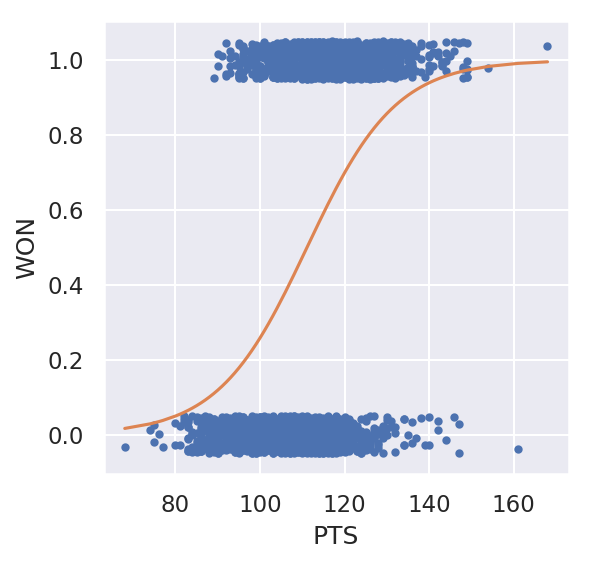

In [145]:
y_hat = logistic_regression_model.predict_proba(df[["PTS"]])
jittered_data = df["WON"] + np.random.uniform(-0.05, 0.05, len(df["WON"]))
plt.plot(df["PTS"], jittered_data, '.')
plt.plot(df[["PTS"]], y_hat[:, 1])
plt.xlabel("PTS")
plt.ylabel("WON")
plt.savefig('WON_vs_PTS_small_dots.png', dpi = 300, bbox_inches = "tight")

We can count how many games our model gets right and how many it gets wrong.

In [147]:
y_hat_class = logistic_regression_model.predict(df[["PTS"]])
correctly_predicted_games = df[y_hat_class == df["WON"]]
incorrectly_predicted_games = df[y_hat_class != df["WON"]]

In [142]:
correctly_predicted_games.head(5)

,TEAM_NAME,GAME_ID,PTS,WON
415,Utah Jazz,21800210,68,0
2031,Detroit Pistons,21801014,74,0
2000,Detroit Pistons,21801003,75,0
2092,Charlotte Hornets,21801045,75,0
796,Orlando Magic,21800397,76,0


In [ ]:
len(correctly_predicted_games)

In [143]:
incorrectly_predicted_games.head(5)

,TEAM_NAME,GAME_ID,PTS,WON
321,Memphis Grizzlies,21800158,89,1
532,Los Angeles Lakers,21800278,90,1
941,Chicago Bulls,21800474,90,1
1943,Miami Heat,21800965,91,1
827,Memphis Grizzlies,21800410,92,1


In [ ]:
len(incorrectly_predicted_games)

We can also compute the overall accuracy of our classifier in a straightforward way.

In [144]:
num_correct = len(correctly_predicted_games)
total_games = len(df)
accuracy = num_correct / total_games
accuracy

0.7069105691056911

We see our model gets 70% of the games correct.

Another way to look at the situation: Our model gets all of the orange points to the left of the black line wrong, and all of the blue points to the right of the black line wrong.

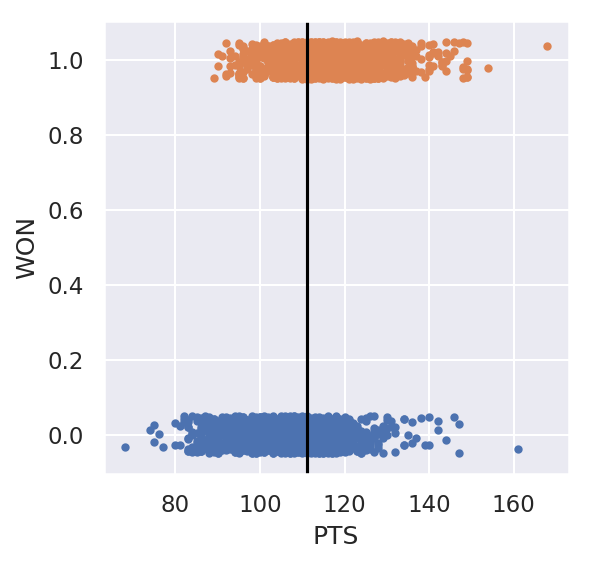

In [146]:
winning_games = df["WON"] == 1
losing_games = ~winning_games

plt.plot(df.loc[winning_games, "PTS"], jittered_data[winning_games], '.', color = "#dd8452")
plt.plot(df.loc[losing_games, "PTS"], jittered_data[losing_games], '.', color = "#4c72b0")
plt.axvline(111.12, color = 'black')
plt.xlabel("PTS")
plt.ylabel("WON")
#plt.savefig('WON_vs_PTS_one_dimensional_logistic_regression.png', dpi = 300, bbox_inches = "tight")

#### Two Feature Model

By using additional features, we can get better accuracy. Let's include some additional features in our dataframe.

In [148]:
df = orig.copy()
df["WON"] = df["WL"]
df["WON"] = df["WON"].replace("W", 1)
df["WON"] = df["WON"].replace("L", 0)
df.head(5)
df = df[["TEAM_NAME", "GAME_ID", "PTS", "REB", "AST", "STL", "BLK", "FGA", "WON"]]
df.head(5)

,TEAM_NAME,GAME_ID,PTS,REB,AST,STL,BLK,FGA,WON
0,Golden State Warriors,21800002,108,58,28,7,7,95,1
1,Oklahoma City Thunder,21800002,100,45,21,12,6,91,0
2,Philadelphia 76ers,21800001,87,47,18,8,5,87,0
3,Boston Celtics,21800001,105,55,21,7,5,97,1
4,Minnesota Timberwolves,21800010,108,46,20,9,2,91,0


This time, let's create a model that uses PTS and REB (rebounds). This additional information should allow us to make better predictions.

In [149]:
logistic_regression_model_2_features = LogisticRegression(penalty = 'none')
logistic_regression_model_2_features.fit(df[["PTS", "REB"]], df["WON"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Looking at our predictions, we see that they are now slightly more accurate, at 74.6%. It seems that knowledge about the number of rebounds helps.

In [151]:
y_hat_class = logistic_regression_model_2_features.predict(df[["PTS", "REB"]])   #, "AST", "STL", "BLK", "FGA"]])
correctly_predicted_games = df[y_hat_class == df["WON"]]
incorrectly_predicted_games = df[y_hat_class != df["WON"]]
num_correct = len(correctly_predicted_games)
total_games = len(df)
accuracy = num_correct / total_games
accuracy

0.7463414634146341

#### Algebraic Two Dimensional Logistic Regression

What's going on behind the scenes is a simple generalization of what we saw before. Now, our model has three parameters $\theta_0$, $\theta_1$, and $\theta_2$, where $\theta_1$ and $\theta_2$ are the coefficients of $\text{PTS}$ and $\text{REB}$.

That is, the output is given by $\sigma(\theta_0 + \theta_1 \times \text{PTS} + \theta_2 \times {REB})$.

In [152]:
logistic_regression_model_2_features.intercept_

array([-14.95449277])

In [153]:
logistic_regression_model_2_features.coef_

array([[0.09457075, 0.09861689]])

In [154]:
logistic_regression_model_2_features.predict_proba([[110, 60]])

array([[0.2033798, 0.7966202]])

In [155]:
logistic_regression_model_2_features.predict([[110, 60]])

array([1])

#### Vi|sual Two Dimensional Logistic Regression

In [156]:
xx, yy = np.meshgrid(np.linspace(80, 130, 10),
                     np.linspace(30, 70, 10))

p_win = logistic_regression_model_2_features.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
p_win = p_win.reshape(xx.shape)


In [157]:
import plotly
import plotly.graph_objs as go

surface = go.Surface(x = xx, y = yy, z = p_win, colorscale='Viridis')
surface_fig = go.Figure(data=[surface])

surface_fig.update_layout(scene = dict(
                    xaxis_title='PTS',
                    yaxis_title='REB',
                    zaxis_title='Prediction'))


plotly.offline.iplot(surface_fig)


Or as a contour plot:

In [158]:
import plotly
import plotly.graph_objs as go

contour = go.Contour(x = xx[0, :], y = yy[:, 0], z = p_win, colorscale='Viridis')
contour_fig = go.Figure(data=[contour])

contour_fig.update_layout(xaxis_title='PTS',
                    yaxis_title='REB')

plotly.offline.iplot(contour_fig)

In [ ]:
xx, yy = np.meshgrid(np.linspace(60, 175, 500),
                     np.linspace(20, 75, 500))

classification = logistic_regression_model_2_features.predict(np.c_[xx.ravel(), yy.ravel()])
classification = classification.reshape(xx.shape)

In [ ]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])

cs = plt.contourf(xx, yy, classification, cmap=sns_cmap)
plt.xlabel("PTS")
plt.ylabel("REB")
plt.savefig("2d_prediction_plot.png", bbox_inches = "tight", dpi = 300)


In [ ]:
from matplotlib.colors import ListedColormap
sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])

cs = plt.contourf(xx, yy, classification, cmap=sns_cmap)
plt.xlabel("PTS")
plt.ylabel("REB")
sns.scatterplot(data = df, x = "PTS", y="REB", hue="WON", s = 6, edgecolor = "black", linewidth = 0.5)

plt.savefig("2d_prediction_plot_with_data.png", bbox_inches = "tight", dpi = 300)


If we plot the correctness of our predictions vs. PTS, we see that the story is more complicated than before. There is no longer a dividing line that separates our predictions.

To understand the predictions made by our model, we have to look at the 

In [160]:
logistic_regression_model_6 = LogisticRegression(penalty = 'none')
logistic_regression_model_6.fit(df[["PTS", "REB", "AST", "STL", "BLK", "FGA"]], df["WON"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
logistic_regression_model_6.coef_

array([[ 0.11985109,  0.21075955,  0.07320837,  0.20912002,  0.06938663,
        -0.17987802]])

In [163]:
y_hat_class = logistic_regression_model_6.predict(df[["PTS", "REB", "AST", "STL", "BLK", "FGA"]])
y_hat_class

array([1, 0, 0, ..., 0, 0, 1])

In [165]:
logistic_regression_model_6.predict([[100, 35, 10, 20, 16, 45]])

array([1])

In [166]:
correctly_predicted_games = df[y_hat_class == df["WON"]]
incorrectly_predicted_games = df[y_hat_class != df["WON"]]

Our accuracy is now better, at 79%.

In [167]:
num_correct = len(correctly_predicted_games)
total_games = len(df)
accuracy = num_correct / total_games
accuracy

0.7926829268292683